#1. Data Preparation

In [141]:
# Seed value
seed_value= 1

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
seed_value += 1

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
seed_value += 1

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
seed_value += 1

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [191]:
%run parseData.ipynb
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #ploting graphs
import seaborn as sns #ploting histogram
from keras.utils import to_categorical
from sklearn import preprocessing

In [192]:
path = "./data/"
all_data = read_data(path)

df = pd.DataFrame(all_data)

df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,122.989521,5.031775,...,-67.582787,-125.367848,-72.437172,-50.852973,-96.587422,-79.767570,-67.930081,-70.781021,-70.997175,-87.361629
1,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,135.335277,22.762292,...,-102.868148,83.136421,15.529929,90.343455,78.789987,5.173831,90.525847,72.386893,-4.364089,104.625646
2,2.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,141.891296,28.615349,...,-109.162265,82.213256,36.904574,89.425871,76.610167,22.542002,89.209393,73.080910,-3.183434,110.232384
3,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,141.153613,28.042486,...,-105.087837,83.791429,7.936759,89.145902,79.618323,-2.325866,93.411176,73.203217,-12.320351,108.900585
4,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,123.134389,5.315064,...,-66.555146,-124.152353,-72.004125,-51.785051,-94.026793,-73.783497,-70.421552,-73.377815,-68.075547,-86.260239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.0,0.0,90.0,0.0,90.0,90.0,0.0,90.0,122.614573,4.287325,...,-81.754566,-107.065210,-53.726304,-70.333974,-91.023534,-65.107666,-72.712935,-75.630734,-60.661152,-78.039362
137,0.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,124.094955,7.134718,...,-80.195751,-107.807068,-54.620815,-68.109049,-90.726091,-64.963215,-72.025726,-75.959467,-57.988046,-77.981016
138,2.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,136.603173,24.038820,...,-103.526456,83.659255,6.292691,89.509778,80.077232,-10.129482,95.358262,73.911740,-17.020133,113.360972
139,3.0,1.0,90.0,0.0,90.0,90.0,0.0,90.0,147.781999,32.549146,...,78.722611,83.946763,5.318254,98.947336,-84.106138,-0.536928,-67.423933,-77.834945,-14.002819,-60.967182


In [193]:
#data_temp = np.array(df)
labels = all_data[:, :1]

In [194]:
data = all_data[:, 2:]

data.shape
#data = df.reindex(columns=df.columns[2:])

#scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform([[x] for x in data])

#scaled


(141, 72)

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state= 2, stratify=labels)

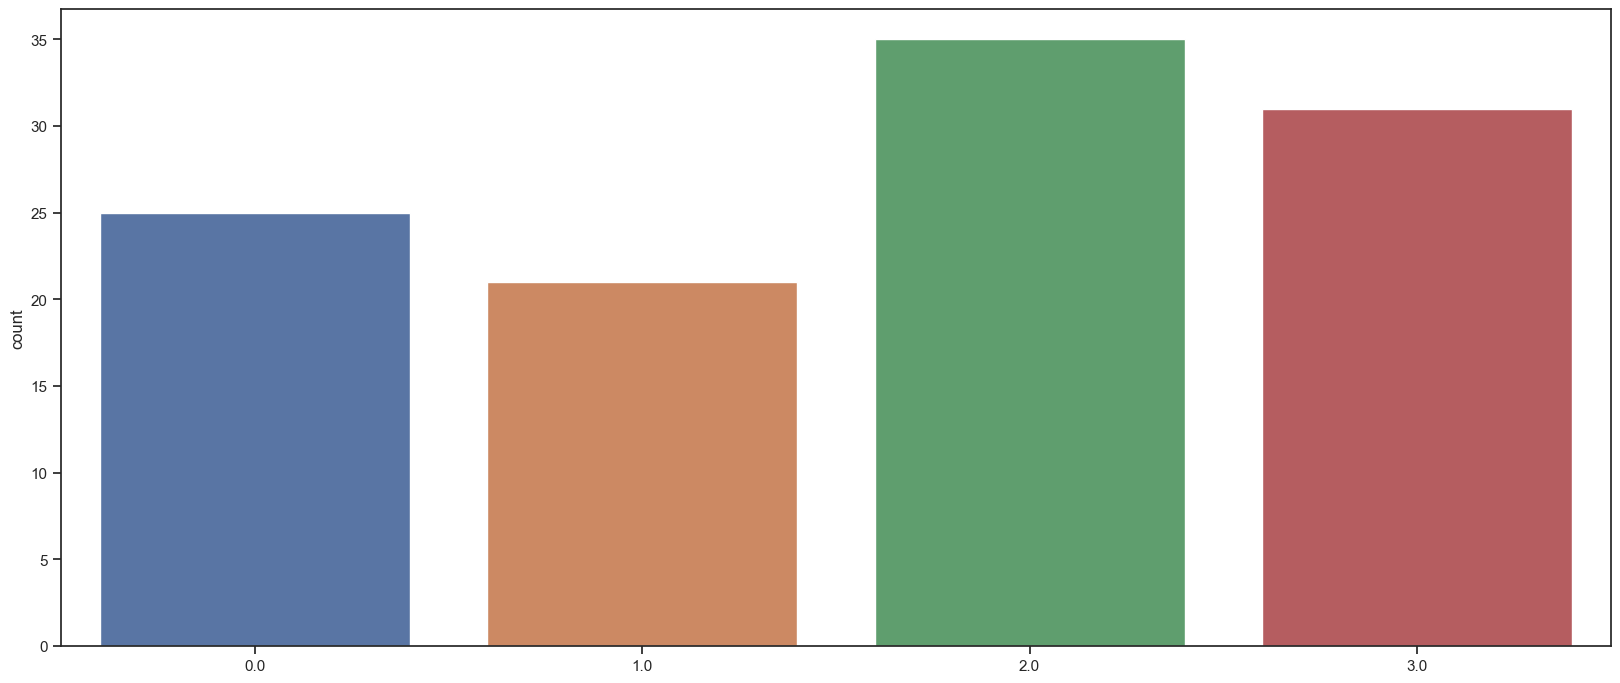

In [196]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.set_style("ticks")
_ = sns.countplot(x=y_train.reshape(-1))

In [197]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 72)
y_train shape: (112, 1)

X_test shape: (29, 72)
y_test shape: (29, 1)


Changing labels shape to categorical: 

In [198]:
y_train[0]

array([3.])

In [199]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [200]:
y_train[0]

array([0., 0., 0., 1.], dtype=float32)

In [201]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

y_train shape: (112, 4)
y_test shape: (29, 4)


In [153]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [202]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [203]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (112, 72, 1)
X_test shape: (29, 72, 1)


In [204]:
class_mapping = ['thumbs_up','thumbs_down','ok','victory']
num_classes = 4

#2. Creating and training CNN

In [205]:
import keras
from keras import layers  
from keras import models
from keras import callbacks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [206]:
def create_1D_model():
  model = models.Sequential()

  model.add(layers.Conv1D(32, 3, input_shape=X_train.shape[1:3], activation='relu', ))
  model.add(layers.Conv1D(16, 1, activation='relu', ))
  model.add(layers.Dropout(0.2))
  model.add(layers.MaxPooling1D(pool_size=2))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

In [207]:
model = create_1D_model()
model.compile(optimizer=keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])

In [208]:
MCP = keras.callbacks.ModelCheckpoint('./results/' + 'Best_model.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [209]:
history = model.fit(X_train, y_train, batch_size=32,epochs=100, validation_data=(X_test, y_test),callbacks=[MCP,ES,RLP],verbose=1)

Epoch 1/100
1/4 [======>.......................] - ETA: 1s - loss: 11.1124 - accuracy: 0.3750 - precision: 0.3750 - recall: 0.3750
Epoch 1: val_accuracy improved from -inf to 0.48276, saving model to ./results\Best_model.h5
4/4 [==============================] - 1s 88ms/step - loss: 46.1529 - accuracy: 0.3929 - precision: 0.3929 - recall: 0.3929 - val_loss: 3.8382 - val_accuracy: 0.4828 - val_precision: 0.4828 - val_recall: 0.4828 - lr: 0.0100
Epoch 2/100
1/4 [======>.......................] - ETA: 0s - loss: 3.4658 - accuracy: 0.3125 - precision: 0.3226 - recall: 0.3125
Epoch 2: val_accuracy improved from 0.48276 to 0.75862, saving model to ./results\Best_model.h5
4/4 [==============================] - 0s 28ms/step - loss: 2.0821 - accuracy: 0.5625 - precision: 0.5780 - recall: 0.5625 - val_loss: 0.3339 - val_accuracy: 0.7586 - val_precision: 0.7778 - val_recall: 0.7241 - lr: 0.0100
Epoch 3/100
1/4 [======>.......................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8125 - precisio

#3. CNN evaluation

In [210]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1438 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - 20ms/epoch - 20ms/step


[0.14383655786514282, 1.0, 1.0, 1.0]

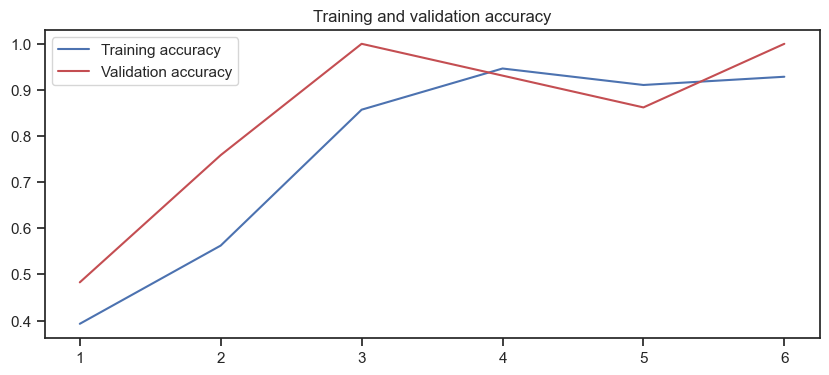

<Figure size 2000x827 with 0 Axes>

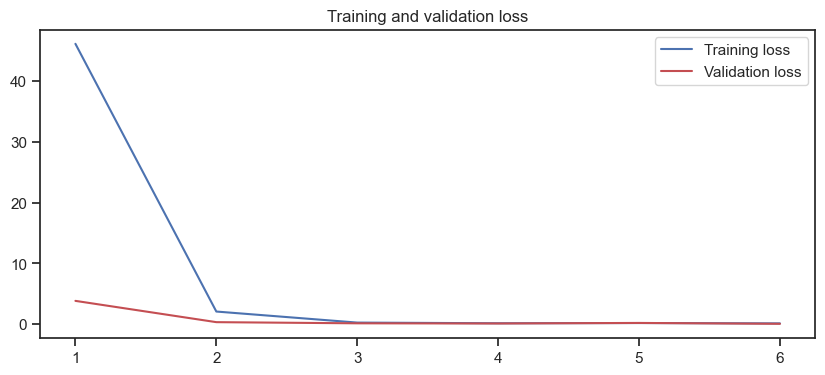

In [211]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 4))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend() 
plt.savefig('Training and validation accuracy.png',dpi=200)
plt.figure()

plt.figure(figsize=(10, 4))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [212]:
predictions = np.argmax(model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

1/1 [==============================] - 0s 57ms/step


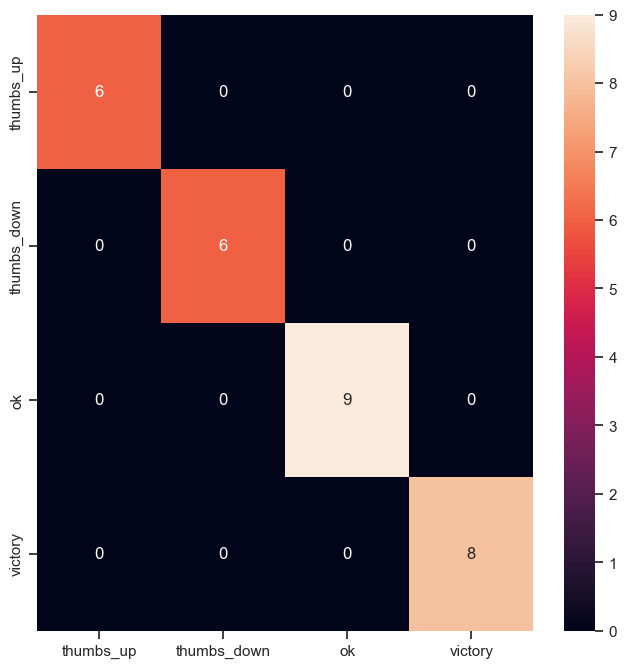

In [213]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(actual, predictions)
g = sns.heatmap(cm, annot=True, fmt='.0f')
g.set_xticklabels(class_mapping)
g.set_yticklabels(class_mapping)
plt.show()

In [214]:
y_test_temp = np.argmax(y_test, axis=1)
print(classification_report(y_test_temp, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29

